In [11]:
from LinearM import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

regr = LinearRegression()

In [12]:
df = pd.read_csv("dataset.csv")

In [14]:
del df["Data_Point"]

In [15]:
df

,Rat_Weight_(g),Rat_Height_(cm)
0,34.1,56.2
1,37.2,72.1
2,32.1,51.9
3,33.2,55.1
4,39.1,75.2
5,36.6,69.1
6,34.8,60.1
7,30.2,34.5
8,29.2,32.1


In [24]:
x = df["Rat_Weight_(g)"]
y = df["Rat_Height_(cm)"]

coef = regr.find_coef(x, y)
intercept = regr.intercept(x, y)
r_sq = regr.r_sq(x, y)
print(f"Este é o coeficiente angular da reta: {coef}; este é o coeficiente linear da reta: {intercept}; e este é o R^2 do modelo preditivo: {r_sq}.")

Este é o coeficiente angular da reta: 4.58753546976284; este é o coeficiente linear da reta: -99.976; e este é o R^2 do modelo preditivo: 0.9623349828370533.


In [27]:
Predicted_Data = regr.predict(x, y)
df["Predicted_Rat_Height_(cm)"] = Predicted_Data
pred_y = df["Predicted_Rat_Height_(cm)"]

In [28]:
df

,Rat_Weight_(g),Rat_Height_(cm),Predicted_Rat_Height_(cm)
0,34.1,56.2,56.459446
1,37.2,72.1,70.680806
2,32.1,51.9,47.284375
3,33.2,55.1,52.330664
4,39.1,75.2,79.397123
5,36.6,69.1,67.928285
6,34.8,60.1,59.670721
7,30.2,34.5,38.568058
8,29.2,32.1,33.980522


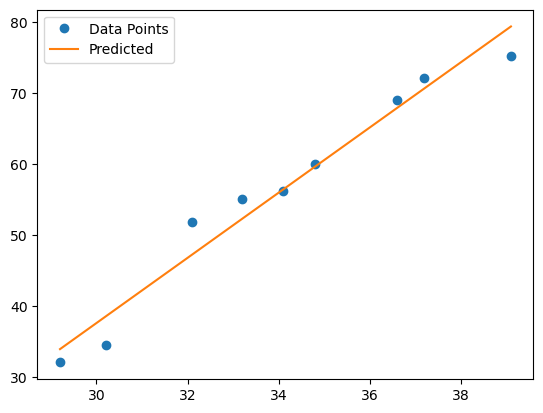

In [30]:
x, y, pred_y = zip(*sorted(zip(x, y, pred_y)))

plt.plot(x, y, 'o', label="Data Points")
plt.plot(x, pred_y, label="Predicted")
plt.legend()
plt.show()